## Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import math

## Método da Bissecção



In [ ]:
df_bisseccao = pd.DataFrame()
def bisseccao(f, a0, b0, epsilon, iteracao, criterio):
  a = a0
  b = b0
  if (f(a)*f(b) < 0):
    colunas = ['n', 'a', 'b', 'x', 'f(x)', 'f(a)']
    df_bisseccao = pd.DataFrame(columns=colunas)
    k = 1
    if (criterio == "precisao"):
      if (b-a < epsilon):
        x = b
        df_bisseccao.loc[0] = [k, a, b, x, f(x), f(a)]        
      while ((b-a) >= epsilon):
        x = (a+b) / 2
        tamanho = df_bisseccao.shape[0]
        df_bisseccao.loc[tamanho] = [k, a, b, x, f(x), f(a)]
        if (f(a)*f(x) > 0):
          a = x
        else:
          b = x
        k = k+1
      x = b
    else: #iteracao
      while (k <= iteracao):
        x = (a+b) / 2
        tamanho = df_bisseccao.shape[0]
        df_bisseccao.loc[tamanho] = [k, a, b, x, f(x), f(a)]
        if (f(a)*f(x) > 0):
          a = x
        else:
          b = x
        k = k+1
      x = b
    print(df_bisseccao)
    print("\nRaiz: ", x)
    print("Iterações: ", k-1)
    return df_bisseccao['x']
  else:
    print("Não há raíz no intervalo.")

## Método da Falsa Posição

In [ ]:
def falsaPosicao(f, a0, b0, epsilon, iteracao, criterio):
  a = a0
  b = b0
  if (f(a)*f(b) < 0):
    colunas = ['n', 'a', 'b', 'x', 'f(x)', 'f(a)']
    df_falsaPosicao = pd.DataFrame(columns=colunas)
    k = 1
    if (criterio == 'precisao'):
      if (b-a < epsilon):
        x = b
        df_falsaPosicao.loc[0] = [k-1, a, b, x, f(x), f(a)]
      while (b-a >= epsilon):
        x = ((a*f(b)) - (b*f(a))) / (f(b) - f(a))
        tamanho = df_falsaPosicao.shape[0]
        df_falsaPosicao.loc[tamanho] = [k, a, b, x, f(x), f(a)]
        if (f(a)*f(x) > 0):
          a = x
        else:
          b = x
        k = k+1
        if (abs(f(x)) < epsilon):
          break
        else:
          x = b
    else: #iteracao
      while (k <= iteracao):
        x = ((a*f(b)) - (b*f(a))) / (f(b) - f(a))
        tamanho = df_falsaPosicao.shape[0]
        df_falsaPosicao.loc[tamanho] = [k, a, b, x, f(x), f(a)]
        if (f(a)*f(x) > 0):
          a = x
        else:
          b = x
        k = k+1
      x = b
    print(df_falsaPosicao)
    print("\nRaiz: ", x)
    print("Iterações: ", k-1)
    return df_falsaPosicao['x']
  else:
    print("Não há raíz no intervalo.")

## Método da Tangente

In [ ]:
def tangente(f, x0, epsilon, iteracao, criterio):
  sp.var('z')
  k = 1
  colunas = ['n', 'x', 'f(x)']
  df_tangente = pd.DataFrame(columns=colunas)
  if (criterio == 'precisao'):
    if (abs(f(x0)) < epsilon):
      x = x0
      df_tangente.loc[0] = [k, x, f(x)]
    else:
      while (1):
        derivada = sp.diff(f(z), z).subs(z, x0)
        x1 = x0 - (f(x0) / derivada)
        x1 = sp.N(x1)
        x = x1
        tamanho = df_tangente.shape[0]
        df_tangente.loc[tamanho] = [k, x, f(x)]
        k = k+1
        if (abs(f(x1)) < epsilon or abs(x1-x0) < epsilon):
          break
        x0 = x1
  else: # iteracao
    while (k <= iteracao):
      derivada = sp.diff(f(z), z).subs(z, x0)
      x1 = x0 - (f(x0) / derivada)
      x0 = x1
      k = k+1
      x = x1
      tamanho = df_tangente.shape[0]
      df_tangente.loc[tamanho] = [k, x, f(x)]
  print(df_tangente)
  print("\nRaiz: ", x)
  print("Iterações: ", k-1)
  return df_tangente['x']

## Método da secante

In [ ]:
def secante(f, x0, x1, epsilon, iteracao, criterio):
  k = 1
  colunas = ['n', 'x', 'f(x)']
  df_secante = pd.DataFrame(columns=colunas)
  if (criterio == 'precisao'):
    if (abs(f(x0)) < epsilon):
      x = x0
      df_secante.loc[0] = [k, x, f(x)]
    elif (abs(f(x1)) < epsilon or abs(x1-x0) < epsilon):
      x = x1
      df_secante.loc[0] = [k, x, f(x)]
    else:
      while (1):
        x2 = x1 - (f(x1) / (f(x1) - f(x0))) * (x1-x0)
        x = x2
        tamanho = df_secante.shape[0]
        df_secante.loc[tamanho] = [k, x, f(x)]
        k  = k+1
        if (abs(f(x2)) < epsilon or abs(x2-x1) < epsilon):
          break
        x0 = x1
        x1 = x2
  else: # iteracao
    while (k <= iteracao and x1 != x0):
      x2 = x1 - (f(x1) / (f(x1) - f(x0))) * (x1-x0)
      x = x2
      tamanho = df_secante.shape[0]
      df_secante.loc[tamanho] = [k, x, f(x)]
      x0 = x1
      x1 = x2
      k  = k+1
  print(df_secante)
  print("\nRaiz: ", x)
  print("Iterações: ", k-1)
  return df_secante['x']

## Gráfico

In [ ]:
def grafico(f, raizes, metodo):
  inicio = np.min(raizes) - 0.5
  fim = np.max(raizes) + 0.5
  n_ptos = 100
  curva = np.linspace(float(inicio), float(fim), n_ptos)
  valores = [f(valor) for valor in curva]
  aproximado = [f(valor) for valor in raizes]
  plt.plot(curva, valores, linestyle='-')
  plt.plot(raizes, aproximado, 'x', marker='o', color = 'red',
           label='' + str(len(raizes)) + ' iterações')
  i = 0
  for x, y in zip(raizes, aproximado):
    i = i+1
    plt.text(x, y, str(i))
  leg = plt.legend()
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title(metodo)
  plt.grid()
  plt.show()

## Questões

**Questão 1** – Determine a raiz da função f(x) = -12 – 21x + 18x2 – 2.75 x3 com o método da bissecção e da falsa posição. Utilize as aproximações iniciais a = -1 e b = 0 e um critério de parada de 1%.

In [ ]:
f = lambda x: -12 - (21*x) + (18 * x**2) - (2.75 * x**3)

In [ ]:
raizes = bisseccao(f, -1, 0, 0.01, None, 'precisao')

     n         a        b         x      f(x)       f(a)
0  1.0 -1.000000  0.00000 -0.500000  3.343750  29.750000
1  2.0 -0.500000  0.00000 -0.250000 -5.582031   3.343750
2  3.0 -0.500000 -0.25000 -0.375000 -1.448730   3.343750
3  4.0 -0.500000 -0.37500 -0.437500  0.863098   3.343750
4  5.0 -0.437500 -0.37500 -0.406250 -0.313667   0.863098
5  6.0 -0.437500 -0.40625 -0.421875  0.269471   0.863098
6  7.0 -0.421875 -0.40625 -0.414062 -0.023405   0.269471

Raiz:  -0.4140625
Iterações:  7


In [ ]:
raizes = falsaPosicao(f, -1, 0, 0.01, None, 'precisao')

     n    a         b         x      f(x)   f(a)
0  1.0 -1.0  0.000000 -0.287425 -4.411735  29.75
1  2.0 -1.0 -0.287425 -0.379449 -1.289664  29.75
2  3.0 -1.0 -0.379449 -0.405232 -0.351293  29.75
3  4.0 -1.0 -0.405232 -0.412173 -0.093836  29.75
4  5.0 -1.0 -0.412173 -0.414022 -0.024934  29.75
5  6.0 -1.0 -0.414022 -0.414512 -0.006616  29.75

Raiz:  -0.41451224401228687
Iterações:  6


**Questão 2** – Determine a raiz da função f(x) = ln(x2) - 0.7 com o método da bissecção e da falsa posição. Utilize três iterações e as aproximações iniciais a = 0.5 e b = 2.

In [ ]:
f = lambda x: math.log(x**2) - 0.7

In [ ]:
raizes = bisseccao(f, 0.5, 2, None, 3, 'iteracao')

     n     a      b       x      f(x)      f(a)
0  1.0  0.50  2.000  1.2500 -0.253713 -2.086294
1  2.0  1.25  2.000  1.6250  0.271016 -0.253713
2  3.0  1.25  1.625  1.4375  0.025811 -0.253713

Raiz:  1.4375
Iterações:  3


In [ ]:
raizes = falsaPosicao(f, 0.5, 2, None, 3, 'iteracao')

     n    a         b         x      f(x)      f(a)
0  1.0  0.5  2.000000  1.628707  0.275573 -2.086294
1  2.0  0.5  1.628707  1.497014  0.106945 -2.086294
2  3.0  0.5  1.497014  1.448399  0.040917 -2.086294

Raiz:  1.4483985429092026
Iterações:  3


**Questão 3** – Determine a maior raiz real de f(x) = 0.95x3 - 5.9x2 + 10.9x – 6

a) Graficamente

b) Usando o método da tangente (três iterações, x0 = 3.5)

c) Usando o método da secante (três iterações, x0 = 2.5 e x1= 3.5)

In [ ]:
f = lambda x: (0.95*x**3) - (5.9*x**2) + (10.9*x) - 6

   n                 x                 f(x)
0  2  3.36565096952909   0.0712486657439797
1  3  3.34511227577680  0.00154923928209172
2  4  3.34464543173747  7.91815779166427e-7

Raiz:  3.34464543173747
Iterações:  3


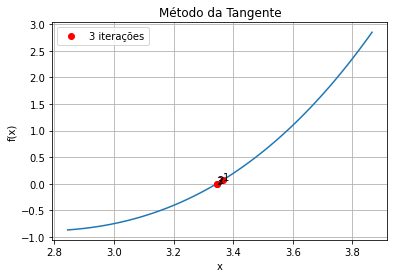

In [ ]:
raizes = tangente(f, 3.5, None, 3, 'iteracao')
grafico(f, raizes, 'Método da Tangente')

     n         x      f(x)
0  1.0  3.063063 -0.666700
1  2.0  3.291906 -0.164874
2  3.0  3.367092  0.076256

Raiz:  3.3670921038139405
Iterações:  3


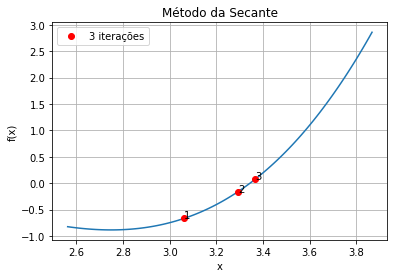

In [ ]:
raizes = secante(f, 2.5, 3.5, None, 3, 'iteracao')
grafico(f, raizes, 'Método da Secante')

**Questão 4** – Determine a menor raiz real de f(x) = 8sen(x)e-x -1

a) Graficamente

b) Usando o método da tangente (três iterações, x0 = 0.3)

c) Usando o método da secante (três iterações, x0 = 0.5 e x1= 0.4)

In [ ]:
f = lambda x: 8 * sp.sin(x) * sp.exp(-x) - 1

   n                  x                  f(x)
0  2  0.107843699702567    -0.226951594756040
1  3  0.143486608396770  -0.00895208458248320
2  4  0.145012084315025  -1.59531454574369e-5

Raiz:  0.145012084315025
Iterações:  3


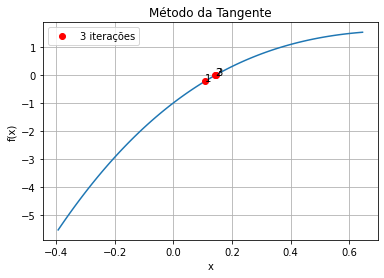

In [ ]:
raizes = tangente(f, 0.3, None, 3, 'iteracao')
grafico(f, raizes, 'Método da Tangente')

   n                    x                f(x)
0  1  -0.0572392281231581   -1.48462438402679
1  2    0.206598277095485   0.334744978337806
2  3    0.158054929166216  0.0750927387144180

Raiz:  0.158054929166216
Iterações:  3


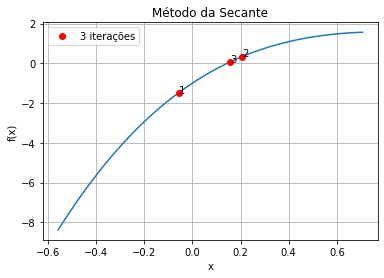

In [ ]:
raizes = secante(f, 0.5, 0.4, None, 3, 'iteracao')
grafico(f, raizes, 'Método da Secante')

**Questão 5** - O polinômio p(x) = x5 – 10/3 x3 + 5/21 x tem suas cinco raízes, todas no intervalo \[-1, 1]

a) Verifique que x1 ∈ \[-1, -0.75], x2 ∈ \[-0.75, -0.25], x3 ∈ \[-0.25, 0.25], x4 ∈ \[0.3, 0.8], x5 ∈ \[0.8, 1]

b) Encontre as raízes utilizando os método elencados abaixo, usando epsilon = 10^-5

x1: Tangente x0 = -0.8

x2: Bissecção a = -0.75 e b= -0.25

x3: Falsa Posição a = -0.25 e b= 0.25

x4: Secante x0 = 0.3 e x1= 0.8

x5: Secante x0 = 0.8 e x1 =1


In [ ]:
f = lambda x: x**5 - (10/3)*x**3 + (5/21)*x

   n                   x                 f(x)
0  1  -0.511099175849616    0.288468904095261
1  2  -0.369201970207860   0.0729880184289255
2  3  -0.298484238495179   0.0152057909373232
3  4  -0.273684593039048  0.00163438572038459
4  5  -0.270299964668665  2.89037248829005e-5
5  6  -0.270237917557127  9.64521215673919e-9

Raiz:  -0.270237917557127
Iterações:  6
A raiz encontrada não está no intervalo X1.


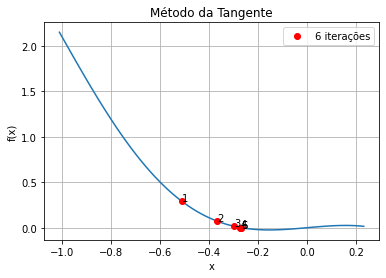

In [ ]:
raizes = tangente(f, -0.8, 0.00001, None, 'precisao')
raiz = raizes[len(raizes)-1]
if (raiz >= -1 and raiz <= -0.75):
  print("A raiz encontrada está no intervalo X1.")
else:
  print("A raiz encontrada não está no intervalo X1.")
grafico(f, raizes, 'Método da Tangente')

       n         a         b         x      f(x)      f(a)
0    1.0 -0.750000 -0.250000 -0.500000  0.266369  0.990374
1    2.0 -0.500000 -0.250000 -0.375000  0.079080  0.266369
2    3.0 -0.375000 -0.250000 -0.312500  0.024340  0.079080
3    4.0 -0.312500 -0.250000 -0.281250  0.005434  0.024340
4    5.0 -0.281250 -0.250000 -0.265625 -0.002094  0.005434
5    6.0 -0.281250 -0.265625 -0.273438  0.001515  0.005434
6    7.0 -0.273438 -0.265625 -0.269531 -0.000328  0.001515
7    8.0 -0.273438 -0.269531 -0.271484  0.000584  0.001515
8    9.0 -0.271484 -0.269531 -0.270508  0.000126  0.000584
9   10.0 -0.270508 -0.269531 -0.270020 -0.000102  0.000126
10  11.0 -0.270508 -0.270020 -0.270264  0.000012  0.000126
11  12.0 -0.270264 -0.270020 -0.270142 -0.000045  0.000012
12  13.0 -0.270264 -0.270142 -0.270203 -0.000016  0.000012
13  14.0 -0.270264 -0.270203 -0.270233 -0.000002  0.000012
14  15.0 -0.270264 -0.270233 -0.270248  0.000005  0.000012
15  16.0 -0.270248 -0.270233 -0.270241  0.000001  0.0000

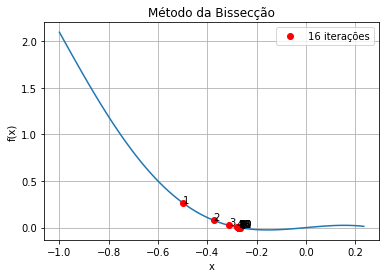

In [ ]:
raizes = bisseccao(f, -0.75, -0.25, 0.00001, None, 'precisao')
raiz = raizes[len(raizes)-1]
if (raiz >= -0.75 and raiz <= -0.25):
  print("A raiz encontrada está no intervalo X2.")
else:
  print("A raiz encontrada não está no intervalo X2.")
grafico(f, raizes, 'Método da Bissecção')

     n     a     b    x  f(x)      f(a)
0  1.0 -0.25  0.25  0.0   0.0 -0.008417

Raiz:  0.0
Iterações:  1
A raiz encontrada está no intervalo X3.


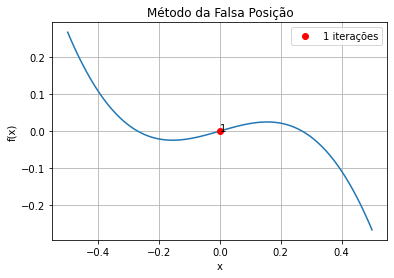

In [ ]:
raizes = falsaPosicao(f, -0.25, 0.25, 0.00001, None, 'precisao')
raiz = raizes[len(raizes)-1]
if (raiz >= -0.25 and raiz <= 0.25):
  print("A raiz encontrada está no intervalo X3.")
else:
  print("A raiz encontrada não está no intervalo X3.")
grafico(f, raizes, 'Método da Falsa Posição')

     n         x          f(x)
0  1.0  0.293116 -1.199219e-02
1  2.0  0.287949 -9.045197e-03
2  3.0  0.272091 -8.714221e-04
3  4.0  0.270401 -7.582963e-05
4  5.0  0.270240 -7.490551e-07

Raiz:  0.27023950588172285
Iterações:  5
A raiz encontrada não está no intervalo X4.


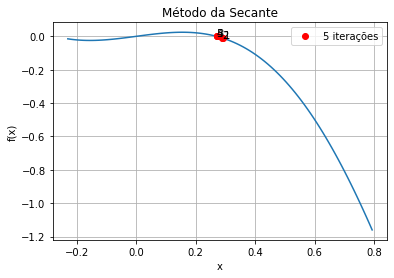

In [ ]:
raizes = secante(f, 0.3, 0.8, 0.00001, None, 'precisao')
raiz = raizes[len(raizes)-1]
if (raiz >= 0.3 and raiz <= 0.8):
  print("A raiz encontrada está no intervalo X4.")
else:
  print("A raiz encontrada não está no intervalo X4.")
grafico(f, raizes, 'Método da Secante')

     n         x          f(x)
0  1.0  0.537846 -3.455578e-01
1  2.0  0.446572 -1.727736e-01
2  3.0  0.355303 -5.925366e-02
3  4.0  0.307664 -2.106527e-02
4  5.0  0.281385 -5.504324e-03
5  6.0  0.272090 -8.708172e-04
6  7.0  0.270343 -4.897793e-05
7  8.0  0.270239 -4.837486e-07

Raiz:  0.27023893598060006
Iterações:  8
A raiz encontrada não está no intervalo X5.


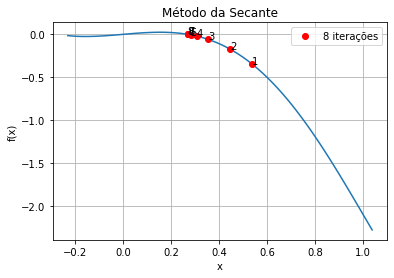

In [ ]:
raizes = secante(f, 0.8, 1, 0.00001, None, 'precisao')
raiz = raizes[len(raizes)-1]
if (raiz >= 0.8 and raiz <= 1):
  print("A raiz encontrada está no intervalo X5.")
else:
  print("A raiz encontrada não está no intervalo X5.")
grafico(f, raizes, 'Método da Secante')

**Questão 6** – Compare o desempenho dos métodos da Bissecção, Falsa Posição, Secante e Tangente nas equações abaixo:

a) f(x) = e-x2 - cos(x)

epsilon1 = epsilon2 = 0.0001

\[1,2]

In [ ]:
f = lambda x: math.exp(-x**2) - math.cos(x)

In [ ]:
raizes = bisseccao(f, 1, 2, 0.0001, None, 'precisao')

       n         a         b         x      f(x)      f(a)
0    1.0  1.000000  2.000000  1.500000  0.034662 -0.172423
1    2.0  1.000000  1.500000  1.250000 -0.105711 -0.172423
2    3.0  1.250000  1.500000  1.375000 -0.043570 -0.105711
3    4.0  1.375000  1.500000  1.437500 -0.006262 -0.043570
4    5.0  1.437500  1.500000  1.468750  0.013776 -0.006262
5    6.0  1.437500  1.468750  1.453125  0.003648 -0.006262
6    7.0  1.437500  1.453125  1.445312 -0.001335 -0.006262
7    8.0  1.445312  1.453125  1.449219  0.001149 -0.001335
8    9.0  1.445312  1.449219  1.447266 -0.000095 -0.001335
9   10.0  1.447266  1.449219  1.448242  0.000527 -0.000095
10  11.0  1.447266  1.448242  1.447754  0.000216 -0.000095
11  12.0  1.447266  1.447754  1.447510  0.000061 -0.000095
12  13.0  1.447266  1.447510  1.447388 -0.000017 -0.000095
13  14.0  1.447388  1.447510  1.447449  0.000022 -0.000017

Raiz:  1.44744873046875
Iterações:  14


In [ ]:
raizes = falsaPosicao(f, 1, 2, 0.0001, None, 'precisao')

     n         a    b         x      f(x)      f(a)
0  1.0  1.000000  2.0  1.284111 -0.090521 -0.172423
1  2.0  1.284111  2.0  1.407549 -0.024619 -0.090521
2  3.0  1.407549  2.0  1.439320 -0.005119 -0.024619
3  4.0  1.439320  2.0  1.445849 -0.000994 -0.005119
4  5.0  1.445849  2.0  1.447115 -0.000190 -0.000994
5  6.0  1.447115  2.0  1.447357 -0.000036 -0.000190

Raiz:  1.4473570678005703
Iterações:  6


In [ ]:
raizes = secante(f, 1, 2, 0.0001, None, 'precisao')

     n         x          f(x)
0  1.0  1.284111 -9.052096e-02
1  2.0  1.407549 -2.461864e-02
2  3.0  1.453661  3.991428e-03
3  4.0  1.447228 -1.185297e-04
4  5.0  1.447413 -5.242250e-07

Raiz:  1.4474134472158682
Iterações:  5


In [ ]:
f = lambda x: sp.exp(-x**2) - sp.cos(x)
raizes = tangente(f, 2, 0.0001, None, 'precisao')

   n                 x                  f(x)
0  1  1.48032972024778    0.0214195905966133
1  2  1.44812072767633  0.000449627254158494
2  3  1.44741462688482   2.26201943218096e-7

Raiz:  1.44741462688482
Iterações:  3


a) f(x) = x3 – x – 1

epsilon1 = epsilon2 = 0.000001

\[1,2]

In [ ]:
f = lambda x: x**3 - x - 1

In [ ]:
raizes = bisseccao(f, 1, 2, 0.000001, None, 'precisao')

       n         a         b         x      f(x)      f(a)
0    1.0  1.000000  2.000000  1.500000  0.875000 -1.000000
1    2.0  1.000000  1.500000  1.250000 -0.296875 -1.000000
2    3.0  1.250000  1.500000  1.375000  0.224609 -0.296875
3    4.0  1.250000  1.375000  1.312500 -0.051514 -0.296875
4    5.0  1.312500  1.375000  1.343750  0.082611 -0.051514
5    6.0  1.312500  1.343750  1.328125  0.014576 -0.051514
6    7.0  1.312500  1.328125  1.320312 -0.018711 -0.051514
7    8.0  1.320312  1.328125  1.324219 -0.002128 -0.018711
8    9.0  1.324219  1.328125  1.326172  0.006209 -0.002128
9   10.0  1.324219  1.326172  1.325195  0.002037 -0.002128
10  11.0  1.324219  1.325195  1.324707 -0.000047 -0.002128
11  12.0  1.324707  1.325195  1.324951  0.000995 -0.000047
12  13.0  1.324707  1.324951  1.324829  0.000474 -0.000047
13  14.0  1.324707  1.324829  1.324768  0.000214 -0.000047
14  15.0  1.324707  1.324768  1.324738  0.000084 -0.000047
15  16.0  1.324707  1.324738  1.324722  0.000018 -0.0000

In [ ]:
raizes = falsaPosicao(f, 1, 2, 0.000001, None, 'precisao')

       n         a    b         x          f(x)      f(a)
0    1.0  1.000000  2.0  1.166667 -5.787037e-01 -1.000000
1    2.0  1.166667  2.0  1.253112 -2.853630e-01 -0.578704
2    3.0  1.253112  2.0  1.293437 -1.295421e-01 -0.285363
3    4.0  1.293437  2.0  1.311281 -5.658849e-02 -0.129542
4    5.0  1.311281  2.0  1.318989 -2.430375e-02 -0.056588
5    6.0  1.318989  2.0  1.322283 -1.036185e-02 -0.024304
6    7.0  1.322283  2.0  1.323684 -4.403950e-03 -0.010362
7    8.0  1.323684  2.0  1.324279 -1.869258e-03 -0.004404
8    9.0  1.324279  2.0  1.324532 -7.929592e-04 -0.001869
9   10.0  1.324532  2.0  1.324639 -3.363010e-04 -0.000793
10  11.0  1.324639  2.0  1.324685 -1.426137e-04 -0.000336
11  12.0  1.324685  2.0  1.324704 -6.047499e-05 -0.000143
12  13.0  1.324704  2.0  1.324712 -2.564380e-05 -0.000060
13  14.0  1.324712  2.0  1.324715 -1.087390e-05 -0.000026
14  15.0  1.324715  2.0  1.324717 -4.610916e-06 -0.000011
15  16.0  1.324717  2.0  1.324717 -1.955187e-06 -0.000005
16  17.0  1.32

In [ ]:
raizes = secante(f, 1, 2, 0.000001, None, 'precisao')

     n         x          f(x)
0  1.0  1.166667 -5.787037e-01
1  2.0  1.253112 -2.853630e-01
2  3.0  1.337206  5.388059e-02
3  4.0  1.323850 -3.698115e-03
4  5.0  1.324708 -4.273426e-05
5  6.0  1.324718  3.458222e-08

Raiz:  1.3247179653538177
Iterações:  6


In [ ]:
raizes = tangente(f, 2, 0.000001, None, 'precisao')

   n                 x                  f(x)
0  1  1.54545454545455      1.14575507137491
1  2  1.35961491591518     0.153704934480075
2  3  1.32580134500585   0.00462491704782986
3  4  1.32471904941713   4.65771910929114e-6
4  5  1.32471795724586  4.74043027054449e-12

Raiz:  1.32471795724586
Iterações:  5


c) f(x) = 4sen(x) - ex

epsilon1 = epsilon2 = 0.00001

\[0,1]

In [ ]:
f = lambda x: 4 * math.sin(x) - math.exp(x)

In [ ]:
raizes = bisseccao(f, 0, 1, 0.00001, None, 'precisao')

       n         a         b         x      f(x)      f(a)
0    1.0  0.000000  1.000000  0.500000  0.268981 -1.000000
1    2.0  0.000000  0.500000  0.250000 -0.294410 -1.000000
2    3.0  0.250000  0.500000  0.375000  0.010099 -0.294410
3    4.0  0.250000  0.375000  0.312500 -0.137084 -0.294410
4    5.0  0.312500  0.375000  0.343750 -0.062146 -0.137084
5    6.0  0.343750  0.375000  0.359375 -0.025677 -0.062146
6    7.0  0.359375  0.375000  0.367188 -0.007701 -0.025677
7    8.0  0.367188  0.375000  0.371094  0.001221 -0.007701
8    9.0  0.367188  0.371094  0.369141 -0.003235 -0.007701
9   10.0  0.369141  0.371094  0.370117 -0.001006 -0.003235
10  11.0  0.370117  0.371094  0.370605  0.000108 -0.001006
11  12.0  0.370117  0.370605  0.370361 -0.000449 -0.001006
12  13.0  0.370361  0.370605  0.370483 -0.000170 -0.000449
13  14.0  0.370483  0.370605  0.370544 -0.000031 -0.000170
14  15.0  0.370544  0.370605  0.370575  0.000038 -0.000031
15  16.0  0.370544  0.370575  0.370560  0.000004 -0.0000

In [ ]:
raizes = falsaPosicao(f, 0, 1, 0.00001, None, 'precisao')

     n    a         b         x      f(x)  f(a)
0  1.0  0.0  1.000000  0.606943  0.446622  -1.0
1  2.0  0.0  0.606943  0.419559  0.108139  -1.0
2  3.0  0.0  0.419559  0.378615  0.018276  -1.0
3  4.0  0.0  0.378615  0.371820  0.002875  -1.0
4  5.0  0.0  0.371820  0.370754  0.000447  -1.0
5  6.0  0.0  0.370754  0.370589  0.000069  -1.0
6  7.0  0.0  0.370589  0.370563  0.000011  -1.0
7  8.0  0.0  0.370563  0.370559  0.000002  -1.0

Raiz:  0.37055882835462395
Iterações:  8


In [ ]:
raizes = secante(f, 0, 1, 0.00001, None, 'precisao')

     n         x          f(x)
0  1.0  0.606943  4.466222e-01
1  2.0 -0.266518 -1.819540e+00
2  3.0  0.434798  1.402583e-01
3  4.0  0.384607  3.174169e-02
4  5.0  0.369925 -1.443434e-03
5  6.0  0.370564  1.309363e-05
6  7.0  0.370558  5.260490e-09

Raiz:  0.37055809827709907
Iterações:  7


In [ ]:
f = lambda x: 4 * sp.sin(x) - sp.exp(x)
raizes = tangente(f, 1, 0.00001, None, 'precisao')

   n                 x                   f(x)
0  1  2.16250934793006      -5.37297827416597
1  2  1.67066116421661      -1.33561057404816
2  3  1.43693713306462     -0.243571253263243
3  4  1.37064028058497    -0.0177289737036821
4  5  1.36499874992076  -0.000124906338940356
5  6  1.36495843578725   -6.36378727492115e-9

Raiz:  1.36495843578725
Iterações:  6


d) x log(x) -1

epsilon1 = epsilon2 = 0.0000001

\[2,3]

In [ ]:
f = lambda x: x * math.log(x) - 1

In [ ]:
raizes = bisseccao(f, 2, 3, 0.0000001, None, 'precisao')

Não há raíz no intervalo.


In [ ]:
raizes = falsaPosicao(f, 2, 3, 0.0000001, None, 'precisao')

Não há raíz no intervalo.


In [ ]:
raizes = secante(f, 2, 3, 0.0000001, None, 'precisao')

     n         x          f(x)
0  1.0  1.797703  5.437062e-02
1  2.0  1.768539  8.339848e-03
2  3.0  1.763256  5.123022e-05
3  4.0  1.763223  4.918713e-08

Raiz:  1.763222865738391
Iterações:  4


In [ ]:
f = lambda x: x * sp.log(x) - 1
raizes = tangente(f, 3, 0.0000001, None, 'precisao')

   n                 x                  f(x)
0  1  1.90602143216202     0.229418226945079
1  2  1.76655899466435   0.00523139540338025
2  3  1.76322484333833   3.14837075832131e-6
3  4  1.76322283435263  1.14441789378361e-12

Raiz:  1.76322283435263
Iterações:  4
